In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
 
# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

In [13]:
# System Specification
n_qubits = 4
circ = QuantumCircuit(n_qubits)
 
# Test Circuit
circ.h(0)
for qubit in range(n_qubits - 1):
    circ.cx(qubit, qubit + 1)
circ.measure_all()
print(circ)

        ┌───┐                ░ ┌─┐         
   q_0: ┤ H ├──■─────────────░─┤M├─────────
        └───┘┌─┴─┐           ░ └╥┘┌─┐      
   q_1: ─────┤ X ├──■────────░──╫─┤M├──────
             └───┘┌─┴─┐      ░  ║ └╥┘┌─┐   
   q_2: ──────────┤ X ├──■───░──╫──╫─┤M├───
                  └───┘┌─┴─┐ ░  ║  ║ └╥┘┌─┐
   q_3: ───────────────┤ X ├─░──╫──╫──╫─┤M├
                       └───┘ ░  ║  ║  ║ └╥┘
meas: 4/════════════════════════╩══╩══╩══╩═
                                0  1  2  3 


In [2]:
# System Specification
n_qubits = 4
circ = QuantumCircuit(n_qubits)
 
# Test Circuit
circ.h(0)
circ.h(1)
circ.h(2)
circ.h(3)
# for qubit in range(n_qubits - 1):
#     circ.cx(qubit, qubit + 1)
circ.measure_all()
print(circ)

        ┌───┐ ░ ┌─┐         
   q_0: ┤ H ├─░─┤M├─────────
        ├───┤ ░ └╥┘┌─┐      
   q_1: ┤ H ├─░──╫─┤M├──────
        ├───┤ ░  ║ └╥┘┌─┐   
   q_2: ┤ H ├─░──╫──╫─┤M├───
        ├───┤ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ H ├─░──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║ └╥┘
meas: 4/═════════╩══╩══╩══╩═
                 0  1  2  3 


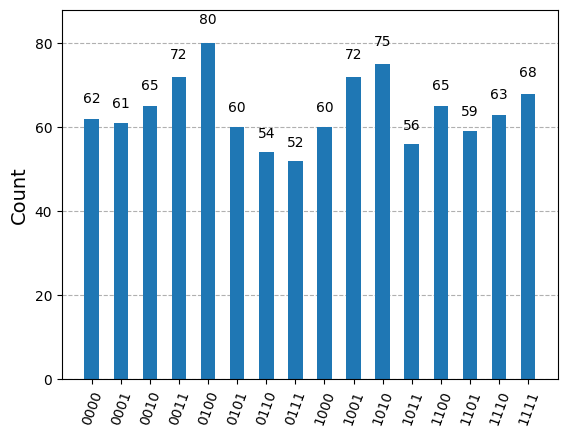

In [3]:
# Ideal simulator and execution
sim_ideal = AerSimulator()
result_ideal = sim_ideal.run(circ).result()
plot_histogram(result_ideal.get_counts(0))

In [5]:
# Function to count 0s and 1s in each position of binary strings
def count_bits(data):
    # Initialize counts
    count_0 = [0] * 4  # Assuming binary strings of length 4
    count_1 = [0] * 4

    # Count 0s and 1s for each position
    for key, value in data.items():
        for i, bit in enumerate(key):
            if bit == '0':
                count_0[i] += value
            elif bit == '1':
                count_1[i] += value

    return count_0, count_1
    
# Function to create histogram with adjustments
def create_histogram_adjusted(count_0, count_1):
    labels = [f'qubit_{i}' for i in range(4)]
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    # Create the histogram
    fig, ax = plt.subplots(figsize=(10, 6))  # Increase the height
    bars1 = ax.bar(x - width/2, count_0, width, label='Count of 0s', color='blue')
    bars2 = ax.bar(x + width/2, count_1, width, label='Count of 1s', color='orange')

    # Add labels, title, and custom x-axis tick labels
    ax.set_ylabel('Counts')
    ax.set_title('Counts of state 0 and state 1 by Qubit Position', y=-0.15)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)  # Adjust legend position

    # Add data labels above each bar
    for bar in bars1:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

    for bar in bars2:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

    # Display the histogram
    plt.tight_layout()
    plt.show()

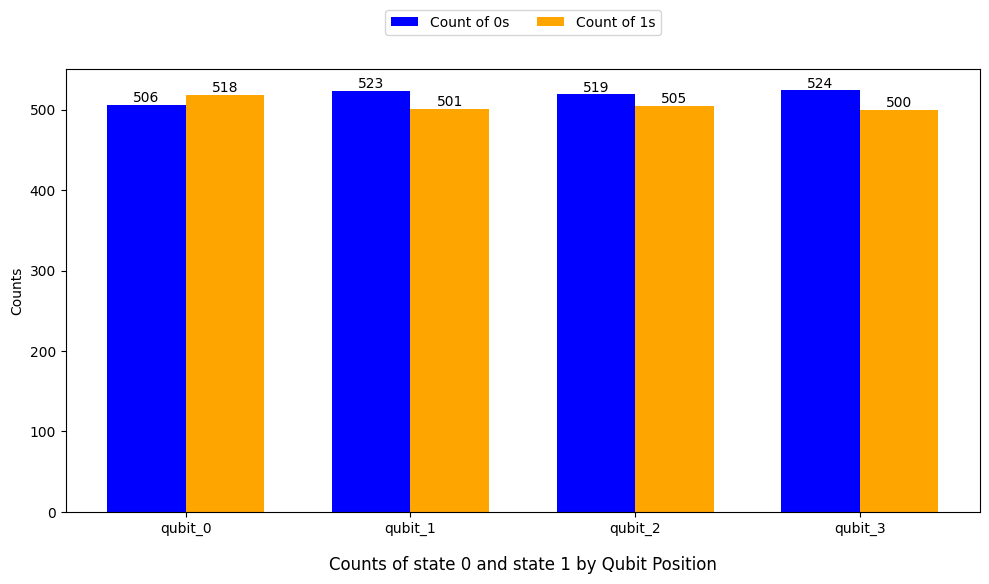

In [6]:
data = result_ideal.get_counts(0)

# Call the function to count bits
count_0, count_1 = count_bits(data)

# Create the histogram
create_histogram_adjusted(count_0, count_1)

In [7]:
def generate_random_numbers_with_median(desired_median, n=4, variance=10):
    # Generate random numbers centered around the desired median
    random_numbers = np.random.normal(desired_median, variance, n)
    
    # Calculate the current median
    current_median = np.median(random_numbers)
    
    # Adjust numbers to achieve the desired median
    adjustment = desired_median - current_median
    adjusted_numbers = random_numbers + adjustment
    
    return adjusted_numbers


In [8]:
T1s = generate_random_numbers_with_median(234350)
print(T1s)
T2s = generate_random_numbers_with_median(146220)
print(T2s)

[234340.46183288 234349.03771963 234350.96228037 234364.5253123 ]
[146207.49709275 146234.33412849 146216.59628162 146223.40371838]


In [12]:
# T1 and T2 values for qubits 0-3
# T1s = np.random.normal(50e3, 10e3, 4) # Sampled from normal distribution mean 50 microsec
# T2s = np.random.normal(70e3, 10e3, 4)  # Sampled from normal distribution mean 50 microsec
 
# # Truncate random T2s <= T1s
# T2s = np.array([min(T2s[j], 2 * T1s[j]) for j in range(4)])
T1s = generate_random_numbers_with_median(2343)
print(T1s)
T2s = generate_random_numbers_with_median(1462)
print(T2s)

# Instruction times (in nanoseconds)
time_u1 = 0   # virtual gate
time_u2 = 50  # (single X90 pulse)
time_u3 = 100 # (two X90 pulses)
time_cx = 300
time_reset = 1000  # 1 microsecond
time_measure = 1000 # 1 microsecond
 
# QuantumError objects
errors_reset = [thermal_relaxation_error(t1, t2, time_reset)
                for t1, t2 in zip(T1s, T2s)]
errors_measure = [thermal_relaxation_error(t1, t2, time_measure)
                  for t1, t2 in zip(T1s, T2s)]
errors_u1  = [thermal_relaxation_error(t1, t2, time_u1)
              for t1, t2 in zip(T1s, T2s)]
errors_u2  = [thermal_relaxation_error(t1, t2, time_u2)
              for t1, t2 in zip(T1s, T2s)]
errors_u3  = [thermal_relaxation_error(t1, t2, time_u3)
              for t1, t2 in zip(T1s, T2s)]
errors_cx = [[thermal_relaxation_error(t1a, t2a, time_cx).expand(
             thermal_relaxation_error(t1b, t2b, time_cx))
              for t1a, t2a in zip(T1s, T2s)]
               for t1b, t2b in zip(T1s, T2s)]
 
# Add errors to noise model
noise_thermal = NoiseModel()
for j in range(4):
    noise_thermal.add_quantum_error(errors_reset[j], "reset", [j])
    noise_thermal.add_quantum_error(errors_measure[j], "measure", [j])
    noise_thermal.add_quantum_error(errors_u1[j], "u1", [j])
    noise_thermal.add_quantum_error(errors_u2[j], "u2", [j])
    noise_thermal.add_quantum_error(errors_u3[j], "u3", [j])
    for k in range(4):
        noise_thermal.add_quantum_error(errors_cx[j][k], "cx", [j, k])
 
print(noise_thermal)

[2342.06176375 2337.05088451 2343.93823625 2344.00765285]
[1445.28245757 1458.352635   1465.647365   1481.24225968]
NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u2', 'u3']
  Instructions with noise: ['u2', 'cx', 'reset', 'measure', 'u3']
  Qubits with noise: [0, 1, 2, 3]
  Specific qubit errors: [('reset', (0,)), ('reset', (1,)), ('reset', (2,)), ('reset', (3,)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,)), ('measure', (3,)), ('u2', (0,)), ('u2', (1,)), ('u2', (2,)), ('u2', (3,)), ('u3', (0,)), ('u3', (1,)), ('u3', (2,)), ('u3', (3,)), ('cx', (0, 0)), ('cx', (0, 1)), ('cx', (0, 2)), ('cx', (0, 3)), ('cx', (1, 0)), ('cx', (1, 1)), ('cx', (1, 2)), ('cx', (1, 3)), ('cx', (2, 0)), ('cx', (2, 1)), ('cx', (2, 2)), ('cx', (2, 3)), ('cx', (3, 0)), ('cx', (3, 1)), ('cx', (3, 2)), ('cx', (3, 3))]


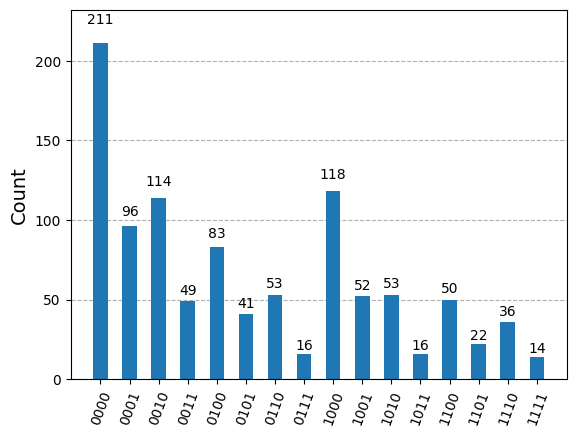

In [13]:
# Run the noisy simulation
sim_thermal = AerSimulator(noise_model=noise_thermal)
 
# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(optimization_level=3, backend=sim_thermal)
circ_tthermal = passmanager.run(circ)
 
# Run and get counts
result_thermal = sim_thermal.run(circ_tthermal).result()
counts_thermal = result_thermal.get_counts(0)
 
# Plot noisy output
plot_histogram(counts_thermal)

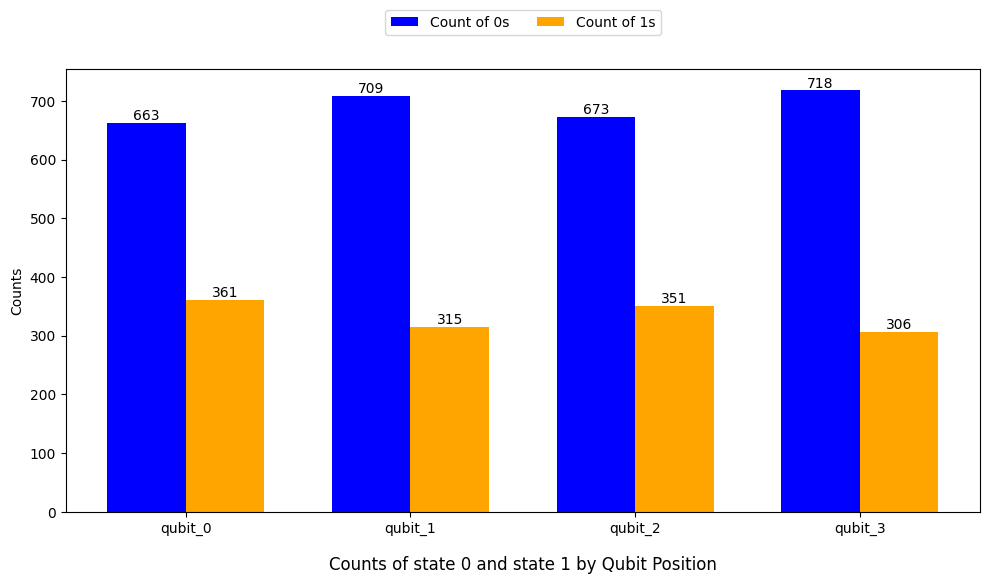

In [15]:
data = result_thermal.get_counts(0)

# Call the function to count bits
count_0, count_1 = count_bits(data)

# Create the histogram
create_histogram_adjusted(count_0, count_1)